# IAMC Reporting

# Plottings

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

import matplotlib.pyplot as plt

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df
from message_ix.tools.add_dac import add_tech
from message_ix.tools.add_dac import get_report
from message_ix.tools.add_dac import get_values

%matplotlib inline

<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


In [2]:
colors = {"SSP5 - Low Overshoot_Relaxed-CCS-v2":"tab:orange",
          "SSP5 - Low Overshoot_Relaxed-CCS-v4":"tab:purple",
          "SSP5 - Low Overshoot_Relaxed-CCS-v5":"tab:blue"}

setups = ['SSP5 - Low Overshoot_Relaxed-CCS-v2',
          'SSP5 - Low Overshoot_Relaxed-CCS-v4',
          'SSP5 - Low Overshoot_Relaxed-CCS-v5',
         ]

setups = {
    "SSP_LED_v1.0" :["baseline","SSP2 - Very Low Emissions"],
    "SSP_SSP1_v1.0":["baseline","SSP1 - Low Emissions","SSP1 - Very Low Emissions"],
    "SSP_SSP2_v1.0":["baseline","SSP2 - Low Overshoot","baseline_1000f",
                     "SSP2 - Medium Emissions", "SSP2 - Medium-Low Emissions","SSP2 - Low Emissions"],
    "SSP_SSP3_v1.0":["SSP3 - High Emissions","baseline_1000f"],
    "SSP_SSP4_v1.0":["baseline","baseline_1000f","SSP4 - Low Overshoot"],
    "SSP_SSP5_v1.0":["baseline_1000f","SSP5 - Low Overshoot","SSP5 - High Emissions"]    
}

setups = {
    "LED" :["baseline","SSP2 - Very Low Emissions"],
    "SSP1":["baseline","SSP1 - Low Emissions","SSP1 - Very Low Emissions"],
    "SSP2":["baseline","SSP2 - Low Overshoot","baseline_1000f",
            "SSP2 - Medium Emissions", "SSP2 - Medium-Low Emissions","SSP2 - Low Emissions"],
    "SSP3":["SSP3 - High Emissions","baseline_1000f"],
    "SSP4":["baseline","baseline_1000f","SSP4 - Low Overshoot"],
    "SSP5":["baseline_1000f","SSP5 - Low Overshoot","SSP5 - High Emissions"]    
} 

setups = [
    "data_SSP2_VL",
    "data_SSP1_L",
    "data_SSP1_VL",
    "data_SSP2_LO",
    "data_SSP2_M",
    "data_SSP2_ML",
    "data_SSP2_L",
    "data_SSP3_H",
    "data_SSP4_LO",
    "data_SSP5_H",
]

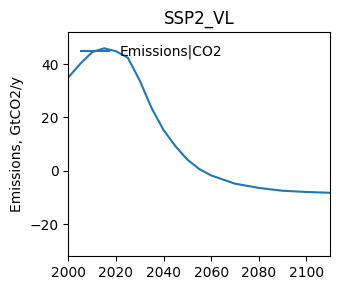

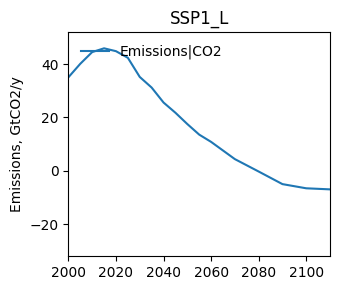

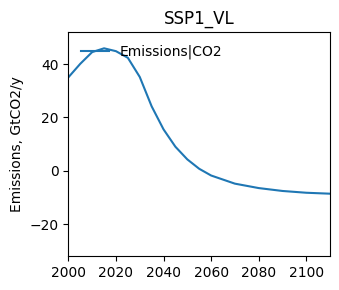

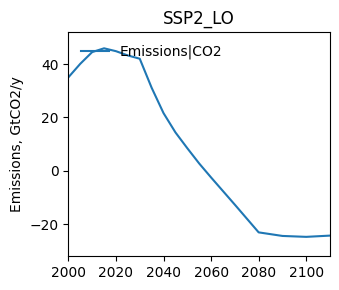

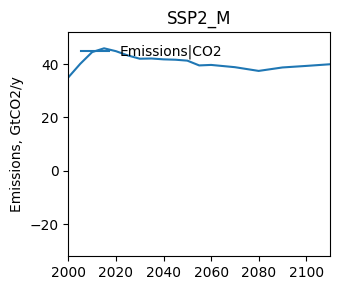

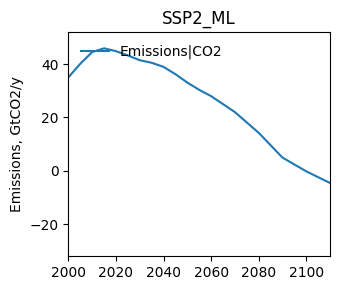

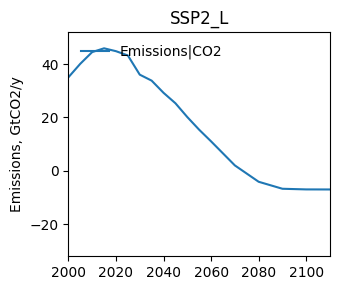

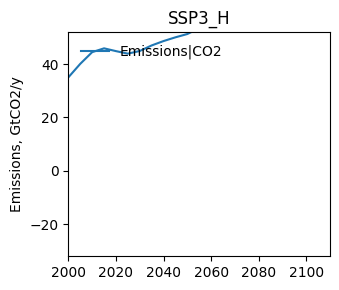

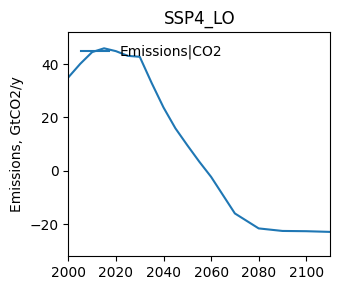

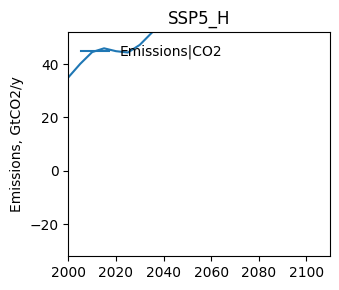

In [5]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\tutorial\dac_scenarios\SSPs\reporting_output'

var_plot = [
    "Emissions|CO2",
]

fname = f'/Scenario_Submission-SSP_Submission_v1_Sept13-2024_SSP_Scenario_Explorer_2024-09-13.xlsx'

for setup in setups:
    df = pd.read_excel(path+fname, sheet_name=setup)
    df = df.fillna('0')
    df = pyam.IamDataFrame(data=df)
    
    fig, ax = plt.subplots(figsize=(3.5,3))
    data = df.filter(region='World', variable=var_plot)
    data_plot = {var: list(data.filter(variable=var).timeseries().div(1000).iloc[0])
                          for var in var_plot}
    years = list(data.timeseries().columns)

    for var in var_plot:
        ax.plot(years, data_plot[var], label=var)
    
    titlename = setup.replace("data_","")
    ax.set_title(titlename)

    ax.set_ylabel("Emissions, GtCO2/y")
    ax.set_ylim(-32,52)
    ax.set_xlim(2000,2110)
    ax.legend(ncol=1, frameon=False, loc='upper left')

    plt.tight_layout()
    fig.savefig(f"sspreview_sv1/{setup}_emissions-GLB.png",dpi=150)
    plt.show()
